### **Project: Tourism Dataset Analysis**

Aim:
The aim of this project is to analyze a tourism dataset to identify key insights and trends that can help stakeholders in the tourism industry make data-driven decisions. The project will focus on analyzing visitor patterns, revenue generation, and the impact of various factors such as tourist destinations, categories, and accommodations on tourism. By exploring this data, we aim to uncover:

The top tourist destinations based on visitors and revenue.
How different categories of tourism (e.g., cultural, adventure) influence visitor numbers.
The relationship between accommodation availability and tourism performance.
xt*

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path =("/content/tourism_dataset.csv")
df =pd.read_csv(file_path)
df.head()

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


# Methodology:
Data Collection:
The dataset used for this analysis contains information about tourist destinations, countries, categories of tourism, visitor numbers, and revenue generated.

Data Cleaning:
Missing values were handled by dropping rows with incomplete data. Duplicates were removed to ensure data integrity.

Exploratory Data Analysis (EDA):
Descriptive statistics and data visualizations were used to explore the data. This includes distribution plots, bar charts, and histograms to identify patterns in visitor numbers and revenue across different locations and
categories.

Insights and Recommendations:
Based on the analysis, key insights were drawn to help understand the impact of various factors on tourism

In [28]:

# Get a concise summary of the dataset, including non-null counts and dtypes
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.6+ KB


,0
Location,0
Country,0
Category,0
Visitors,0
Rating,0
Revenue,0
Accommodation_Available,0


In [29]:
# Drop any rows with missing values (if applicable)
df_clean = df.dropna()

# Check the shape of the cleaned dataset
df_clean.shape


(5989, 7)

In [30]:
df_clean.describe()

,Visitors,Rating,Revenue
count,5989.000000,5989.000000,5989.000000
mean,501016.089497,3.009347,499479.367253
std,289783.294978,1.155980,286743.225211
min,1108.000000,1.000000,1025.810000
25%,252789.000000,2.010000,251410.450000
50%,500831.000000,3.000000,494169.350000
75%,751371.000000,4.010000,742241.240000
max,999982.000000,5.000000,999999.490000


In [31]:

# Remove duplicate rows if any
df_clean = df_clean.drop_duplicates()


# Analysis:
Dataset Summary:

We begin by exploring the dataset to understand its structure, including data types, missing values, and basic statistics (mean, median, etc.).
Visitor Distribution:

A histogram visualized the distribution of visitors to understand the variation across different destinations. This gave insight into which locations attract the most tourists and the frequency of high visitor counts.
Revenue Distribution:

A separate analysis of the revenue distribution showed how income is spread across different tourism locations, identifying top revenue-generating destinations.
Top Tourist Destinations:

By sorting the dataset based on the number of visitors, we identified the top 10 tourist destinations. This helped highlight the locations that attract the most tourists, potentially due to cultural or natural attractions.
Top Countries by Visitors:

Aggregating the data by country provided a country-level analysis of visitor numbers, helping identify the countries that are most popular among tourists.
Category-wise Visitors and Revenue:

We explored the performance of different tourism categories (e.g., cultural, adventure, recreational). This analysis helped understand the popularity and profitability of various categories and how they contribute to the overall tourism economy.
Accommodation and Its Impact:

Finally, the effect of accommodation availability on both visitors and revenue was analyzed. This analysis helped uncover whether destinations with more accommodations tend to attract more visitors and generate higher revenue.


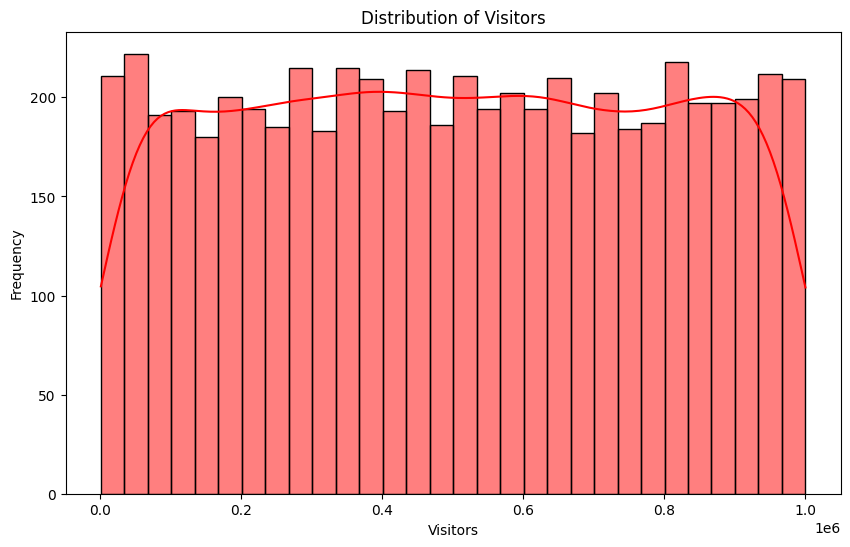

In [32]:
plt.figure(figsize=(10,6))

sns.histplot(df_clean["Visitors"],bins=30,kde=True,color ="red")
plt.title("Distribution of Visitors")
plt.xlabel("Visitors")
plt.ylabel("Frequency")
plt.show()


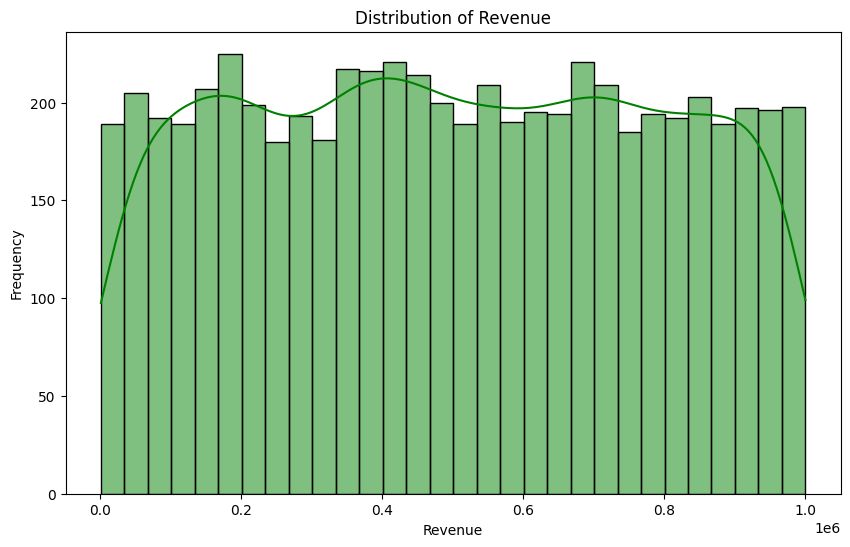

In [33]:
plt.figure(figsize=(10,6))

sns.histplot(df_clean["Revenue"],bins=30,kde=True,color ="green")
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

<ipython-input-34-83c5d3f88324>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location',y='Visitors',data=top_visitors,palette="viridis")


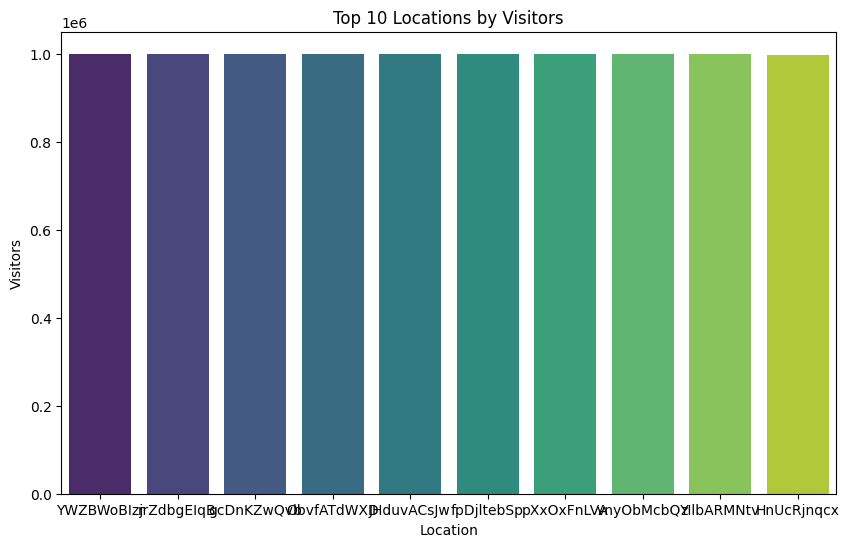

In [34]:
top_visitors = df_clean.sort_values(by="Visitors",ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Location',y='Visitors',data=top_visitors,palette="viridis")
plt.title("Top 10 Locations by Visitors")
plt.xlabel("Location")
plt.ylabel("Visitors")
plt.show()

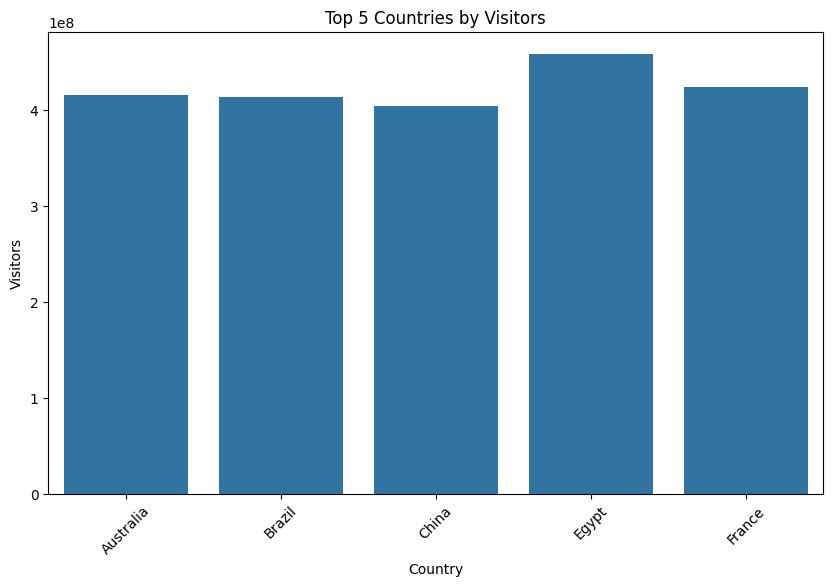

In [35]:
conutry_visitors = df_clean.groupby("Country")["Visitors"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Country',y='Visitors',data=conutry_visitors.head(5))
plt.xticks(rotation=45)
plt.title("Top 5 Countries by Visitors")
plt.xlabel("Country")
plt.ylabel("Visitors")
plt.show()

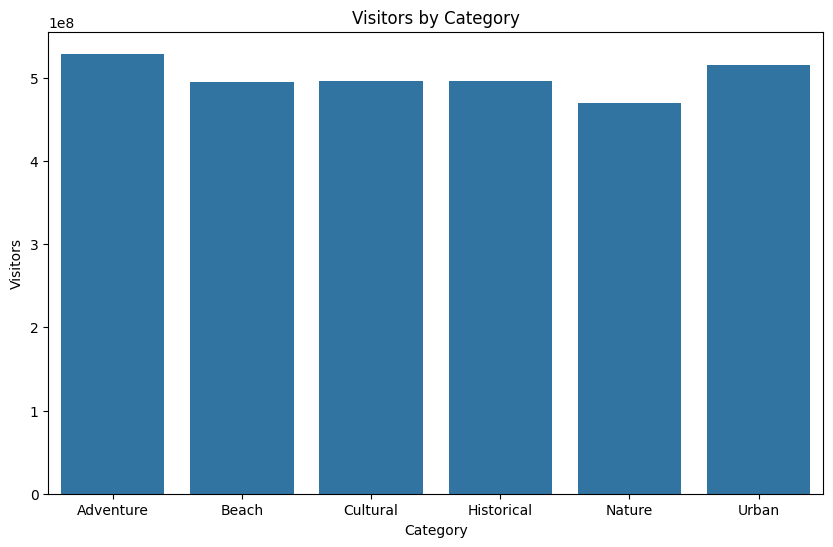

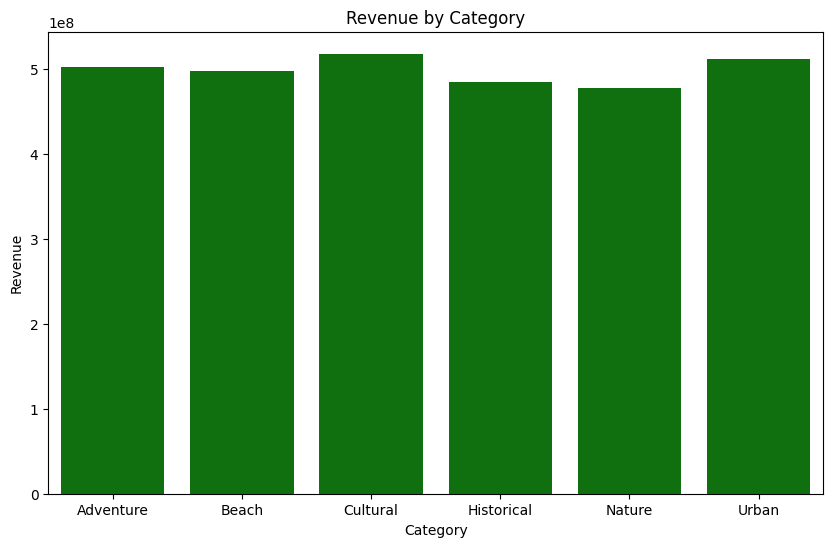

In [39]:
category_analysis = df_clean.groupby("Category")[["Visitors","Revenue"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Visitors',data=category_analysis)
plt.title("Visitors by Category")
plt.xlabel("Category")
plt.ylabel("Visitors")
plt.show


plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Revenue',data=category_analysis,color="green")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

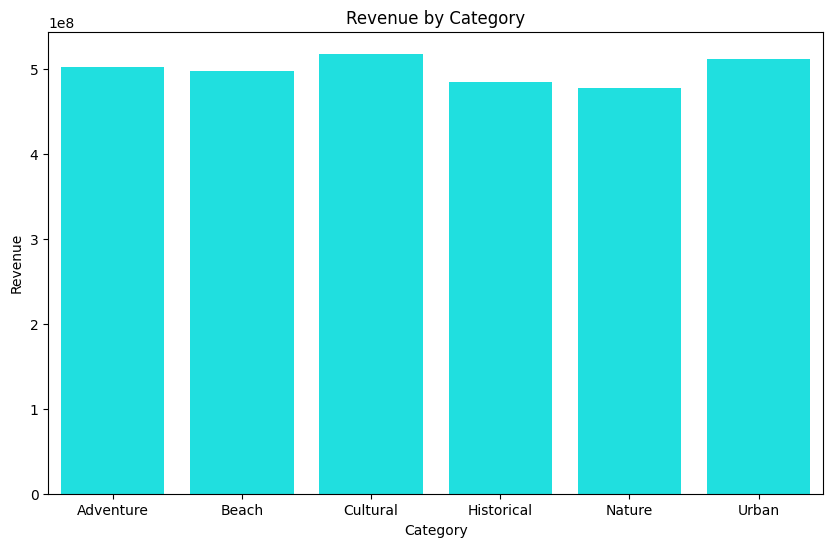

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Revenue',data=category_analysis,color="cyan")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

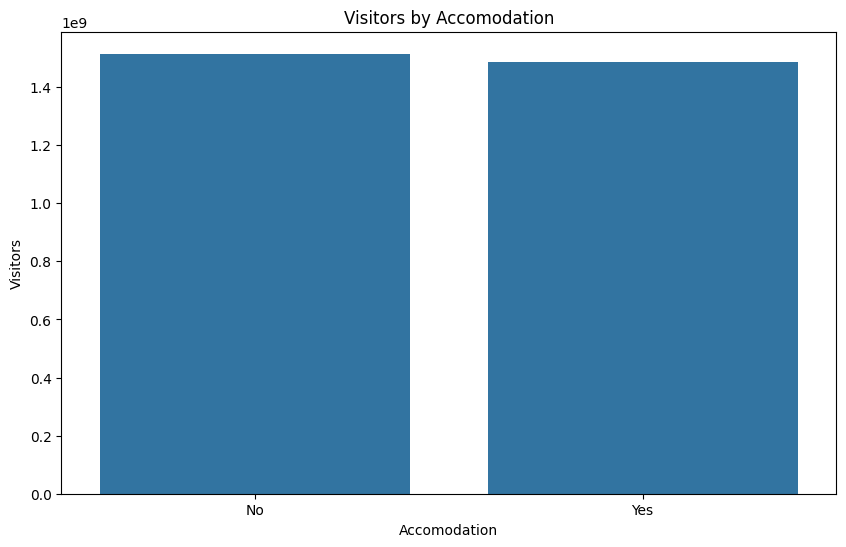

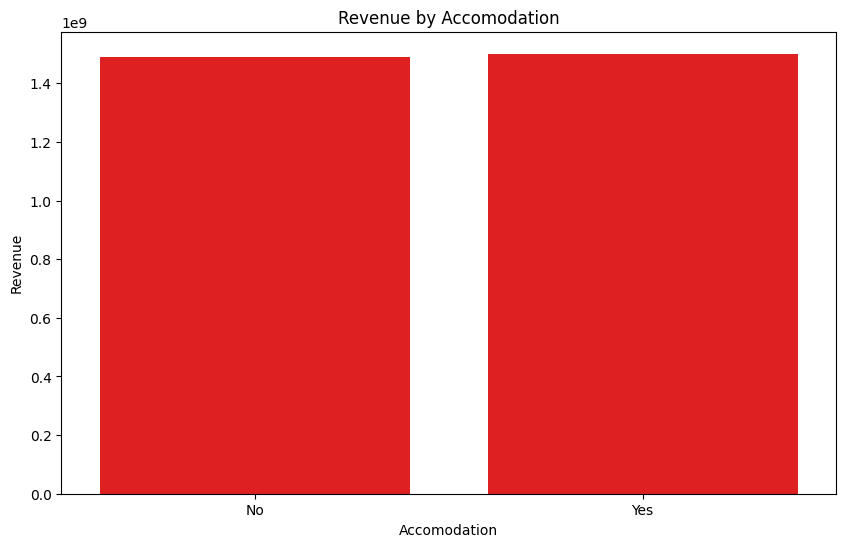

In [45]:
accomdation_impact = df_clean.groupby("Accommodation_Available")[["Visitors","Revenue"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Accommodation_Available',y='Visitors',data=accomdation_impact)
plt.title("Visitors by Accomodation")
plt.xlabel("Accomodation")
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(x='Accommodation_Available',y='Revenue',data=accomdation_impact, color="red")
plt.title("Revenue by Accomodation")
plt.xlabel("Accomodation")
plt.show()

# Conclusion:
The analysis of the tourism dataset led to several important findings:

Top Tourist Destinations:

The top tourist destinations are mainly concentrated in countries that have well-developed infrastructure, cultural significance, and natural beauty. These places tend to attract a large number of visitors and generate significant revenue.
Category-Wise Performance:

Certain categories such as cultural and adventure tourism show higher visitor numbers compared to others. This indicates a trend toward experiential travel, where tourists seek meaningful experiences.
Accommodation's Influence:

Locations with better accommodation availability tend to have higher visitor numbers and revenue. This underscores the importance of infrastructure development in promoting tourism.
Revenue Distribution:

A few destinations and categories contribute the majority of the revenue, indicating that efforts to diversify tourism may help spread the economic benefits more evenly.
Recommendations:
Targeting Key Destinations: Tourism boards should focus marketing and infrastructure investments on top-performing destinations to capitalize on their popularity.
Diversification: Efforts should be made to promote less popular categories or destinations to spread economic benefits.
Infrastructure Development: Enhancing accommodation options in emerging tourist destinations can drive more visitors and revenue.